In [113]:
import numpy as np
import pandas as pd

data = pd.read_csv('../data/Telco-Customer-Churn.csv')
print("Check data null or not")
data

Check data null or not


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [114]:
print("Print Data Type")
df.dtypes

Print Data Type


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [13]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [115]:
# Define binary columns Yes/No or Male/Female
binary_map = {'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0}
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

print(data)
for col in binary_cols:
    data[col] = data[col].map(binary_map)


# 2. Define complex mapping as a dictionary of column: map_dict
multi_map = {
    'MultipleLines': {'Yes': 1, 'No': 0, 'No phone service': 2},
    'InternetService': {'DSL': 1, 'Fiber optic': 2, 'No': 0},
    'OnlineSecurity': {'No': 0, 'Yes': 1, 'No internet service': 2},
    'OnlineBackup': {'No': 0, 'Yes': 1, 'No internet service': 2},
    'DeviceProtection': {'No': 0, 'Yes': 1, 'No internet service': 2},
    'TechSupport': {'No': 0, 'Yes': 1, 'No internet service': 2},
    'StreamingTV': {'No': 0, 'Yes': 1, 'No internet service': 2},
    'StreamingMovies': {'No': 0, 'Yes': 1, 'No internet service': 2},
    'Contract': {'Month-to-month': 0, 'One year': 1, 'Two year': 2},
    'PaymentMethod': {
        'Electronic check': 0,
        'Mailed check': 1,
        'Bank transfer (automatic)': 2,
        'Credit card (automatic)': 3
    },
    'Churn': {'No': 0, 'Yes': 1}
}

for col, mapper in multi_map.items():
    data[col] = data[col].map(mapper)

data

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,2,1,0,...,0,0,0,0,0,1,0,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,1,...,1,0,0,0,1,0,1,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,...,0,0,0,0,0,1,1,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,2,1,1,...,1,1,0,0,1,0,2,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,2,0,...,0,0,0,0,0,1,0,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,1,1,1,...,1,1,1,1,1,1,1,84.80,1990.5,0
7039,2234-XADUH,0,0,1,1,72,1,1,2,0,...,1,0,1,1,1,1,3,103.20,7362.9,0
7040,4801-JZAZL,0,0,1,1,11,0,2,1,1,...,0,0,0,0,0,1,0,29.60,346.45,0
7041,8361-LTMKD,1,1,1,0,4,1,1,2,0,...,0,0,0,0,0,1,1,74.40,306.6,1


In [130]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC

from sklearn.impute import SimpleImputer
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
telco_data = data.copy()

X = telco_data.drop('Churn', axis=1)
y = telco_data['Churn']
X.drop('customerID', axis=1, inplace=True, errors='ignore')
categorical_cols = [x for x in X.select_dtypes(include='object').columns.tolist() if x != 'Churn' and x != 'CustomerID']

numerical_cols = [x for x in X.select_dtypes(include=['int64', 'float64']).columns.tolist() if x != 'Churn' and x != 'CustomerID']

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
])

numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler()),
])

preprocessor = ColumnTransformer([
    ('categorical', categorical_pipeline, categorical_cols),
    ('numerical', numerical_pipeline, numerical_cols),
])

svc_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel='rbf', C=1, gamma='scale', probability=True, class_weight='balanced'))
])

print(X.dtypes)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
roc_auc_scores = cross_val_score(svc_pipeline, X, y, cv=cv, scoring='roc_auc')
print(f'Average ROC AUC score: {np.mean(roc_auc_scores):.3f}')

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
dtype: object
Average ROC AUC score: 0.831


Test ROC-AUC: 0.8122755084993527


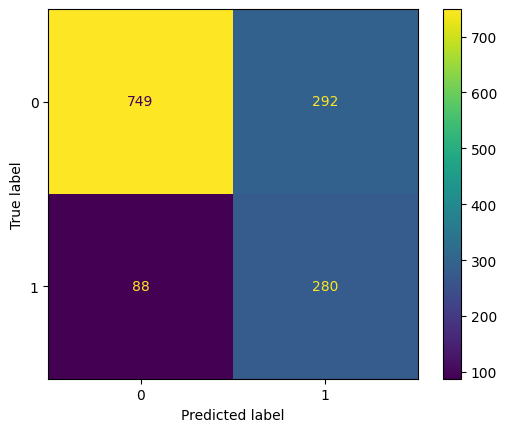

In [133]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
svc_pipeline.fit(X_train, y_train)
y_pred = svc_pipeline.predict(X_test)
y_proba = svc_pipeline.predict_proba(X_test)[:, 1]

print("Test ROC-AUC:", roc_auc_score(y_test, y_proba))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()


